# Decomposition of the Original Variable Data
Given the 13 original time series data observations, we are going to use decomposition to break down the data into the trend, seasonal, and residual parts. This will be then used for further statistical analysis in order to determine if there are any distinct differences that were not previously been able to be seen. The amount of data used will be only up to the 19th day, since after that, many very vital variables such as oxygen intake seem to dip to a highly unlikely level if the experiment were to be free of external effects. Since we do not know the cause of this unexpected change, we will remove that part from analysis until further notice of a cause from the scientists involved in the experiment.


In [144]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

mouse_df_list = list()

# pull 16 mice PCA data
for i in range(1,17):
    df = pd.read_excel("data/originalVars/{}.xlsx".format(i))
    mouse_df_list.append(df)


# create array that will hold all graphs
graphs = []
for mouse in mouse_df_list:
    # create mouse array and iterate through 13 variables
    mouseN = []
    for i in range(13):
        dfAti = pd.DataFrame(mouse.iloc[:864, i])
        dfAti.insert(0, 'DateTime', mouse['DateTime'])
        mouseN.append(dfAti)
    graphs.append(mouseN)

print(len(graphs))
print(len(mouseN))
dfAti

16
13


,DateTime,Stilltime_M
0,2022/11/04 14:01:00,15.44444
1,2022/11/04 14:31:00,0.00000
2,2022/11/04 15:01:00,26.77778
3,2022/11/04 15:31:00,19.27778
4,2022/11/04 16:01:00,8.00000
...,...,...
859,2022/11/22 11:31:00,85.27778
860,2022/11/22 12:01:00,87.22222
861,2022/11/22 12:31:00,93.50000
862,2022/11/22 13:01:00,96.27778


In [145]:
from statsmodels.tsa.seasonal import seasonal_decompose

# creating the arrays with all the decomposed datetime objects converted to dataframes. 16 mice, and each one has 3 graphs for (trend, seasonal, and residual) * 13 variables = 39 elements in each mouse array

DECOMPFREQ = 48
decomps = []
for i in range(len(graphs)):
    mouse_d = []
    for j in range(len(graphs[i])):
        df = graphs[i][j]
        # store variable name from column
        var_name = df.columns[1]

        df['DateTime'] = pd.to_datetime(df['DateTime'])
        df.set_index('DateTime',inplace=True)
        if i == 0 and j == 0:
            print(type(time_series))
        time_series = df.iloc[:, 0]
        # need to use a Linear Least Squares to best approximate the values, hence the third parameter
        # https://stackoverflow.com/questions/52422924/stl-decomposition-getting-rid-of-nan-values
        decomp = seasonal_decompose(time_series, period=DECOMPFREQ, extrapolate_trend='freq')

        # convert datetime object to df, then add to mouse_d arr
        trend = decomp.trend
        df = pd.DataFrame(trend)
        df = df.rename(columns={df.columns[0]: var_name})
        # get rid of indexing by datetime and instead make it a column
        df['DateTime'] = df.index
        df = df.reset_index(drop=True)
        mouse_d.append(df)

        seasonal = decomp.seasonal
        df = pd.DataFrame(seasonal)
        df = df.rename(columns={df.columns[0]: var_name})
        # change datetime index to a column
        df['DateTime'] = df.index
        df = df.reset_index(drop=True)
        mouse_d.append(df)

        residual = decomp.resid
        df = pd.DataFrame(residual)
        df = df.rename(columns={df.columns[0]: var_name})
        # change datetime index to a column
        df['DateTime'] = df.index
        df = df.reset_index(drop=True)
        mouse_d.append(df)


    decomps.append(mouse_d)

print(len(decomps))
print(len(mouse_d))
decomps[0][0]
        


<class 'pandas.core.series.Series'>
16
39


,VO2_M,DateTime
0,0.993188,2022-11-04 14:01:00
1,0.991702,2022-11-04 14:31:00
2,0.990216,2022-11-04 15:01:00
3,0.988731,2022-11-04 15:31:00
4,0.987245,2022-11-04 16:01:00
...,...,...
859,0.908714,2022-11-22 11:31:00
860,0.909438,2022-11-22 12:01:00
861,0.910161,2022-11-22 12:31:00
862,0.910885,2022-11-22 13:01:00


In [146]:
# Download all information to individual .xlsx files in order to be exported for teammates to analyze

# for i in range(len(decomps)):
#     j = 0
#     k = 1
#     while j < len(decomps[i]):
#         # download file to downloads/decomposition
#         decomps[i][j].to_excel('downloads/decompositions/mouse_{}_var_{}_trend'.format(i + 1, k), index=False, engine='openpyxl')
#         j += 1
#         decomps[i][j].to_excel('downloads/decompositions/mouse_{}_var_{}_seasonal'.format(i + 1, k), index=False, engine='openpyxl')
#         j += 1
#         decomps[i][j].to_excel('downloads/decompositions/mouse_{}_var_{}_residual'.format(i + 1, k), index=False, engine='openpyxl')
#         j += 1
#         k += 1

In [148]:
# test to see if can pull .xlsx back and graph it

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('downloads/decompositions/mouse_1_var_10_seasonal')
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime',inplace=True)
df.head()

,PedMeters_M
DateTime,
2022-11-04 14:01:00,-14.335989
2022-11-04 14:31:00,-17.107792
2022-11-04 15:01:00,-19.606108
2022-11-04 15:31:00,-21.014634
2022-11-04 16:01:00,-22.737693


<Axes: xlabel='DateTime'>

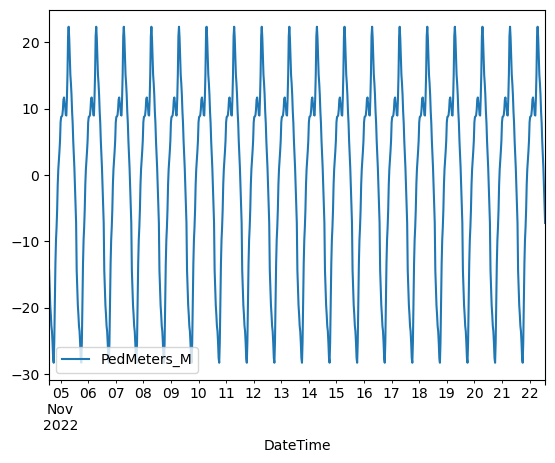

In [149]:
# omg im sorry this is beautiful
df.plot()